In [3]:
import cv2
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
import tensorflow as tf

In [4]:
data_train, ds_info = tfds.load('cats_vs_dogs', split=[tfds.Split.TRAIN], with_info=True)
ds_info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteRY9VRK/cats_vs_dogs-train.tfrecord*...:   0%|    …

Dataset cats_vs_dogs downloaded and prepared to ~/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='~/tensorflow_datasets/cats_vs_dogs/4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and

In [5]:
 images = [one['image'].numpy() for one in data_train[0].take(30)]

In [6]:
len(images)

30

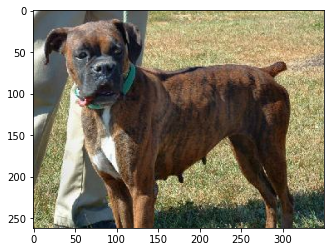

In [12]:
plt.imshow(images[0])

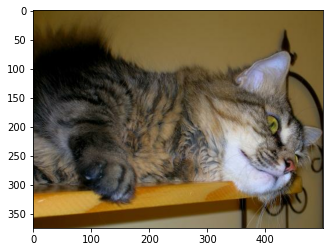

In [14]:
plt.imshow(images[3])

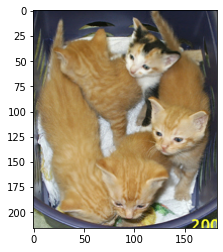

In [15]:
plt.imshow(images[6])

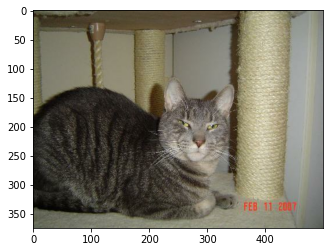

In [16]:
plt.imshow(images[12])

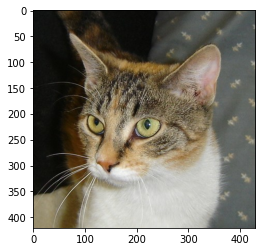

In [18]:
plt.imshow(images[15])

In [19]:
resnet50_pre = tf.keras.applications.resnet.ResNet50(weights = 'imagenet', input_shape=(224,224,3))
resnet50_pre.summary()

102967424/102967424 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [20]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [21]:
def pred_img(img):
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  img_resized = cv2.resize(img, (224,224))
  pred = resnet50_pre.predict(img_resized.reshape([1,224,224,3]))
  decoded_pred = decode_predictions(pred)

  for i, instance in enumerate(decoded_pred[0]) :
    print('{}위: {} ({:.2f}%'.format(i+1, instance[1], instance[2]* 100))

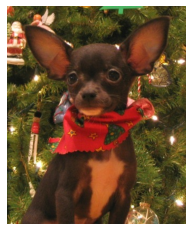

35363/35363 [==============================] - 0s 0us/step
1위: Chihuahua (90.09%
2위: miniature_pinscher (4.65%
3위: French_bulldog (2.58%
4위: Boston_bull (0.80%
5위: boxer (0.45%


In [22]:
pred_img(images[1])

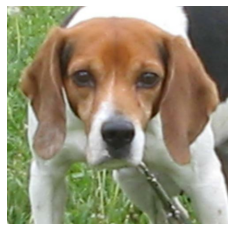

1/1 [==============================] - 0s 33ms/step
1위: German_short-haired_pointer (32.21%
2위: beagle (31.17%
3위: Weimaraner (20.55%
4위: bluetick (5.85%
5위: English_setter (3.35%


In [23]:
pred_img(images[2])

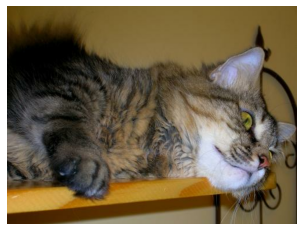

1/1 [==============================] - 0s 20ms/step
1위: tabby (43.60%
2위: lynx (16.35%
3위: tiger_cat (14.93%
4위: Egyptian_cat (6.43%
5위: Persian_cat (3.99%


In [24]:
pred_img(images[3])

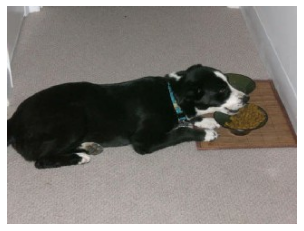

1/1 [==============================] - 0s 19ms/step
1위: Boston_bull (16.58%
2위: Appenzeller (11.26%
3위: Staffordshire_bullterrier (9.44%
4위: Greater_Swiss_Mountain_dog (8.46%
5위: collie (7.79%


In [25]:
pred_img(images[4])

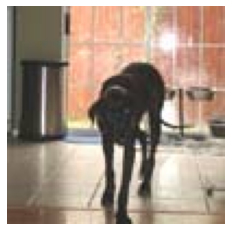

1/1 [==============================] - 0s 20ms/step
1위: Great_Dane (48.84%
2위: redbone (28.99%
3위: tusker (4.38%
4위: Weimaraner (3.46%
5위: bloodhound (2.59%


In [26]:
pred_img(images[5])

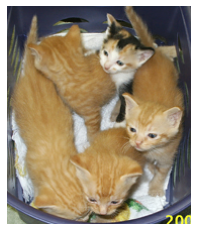

1/1 [==============================] - 0s 20ms/step
1위: ashcan (28.88%
2위: plastic_bag (27.71%
3위: bucket (6.52%
4위: cup (5.80%
5위: caldron (2.57%


In [27]:
pred_img(images[6])

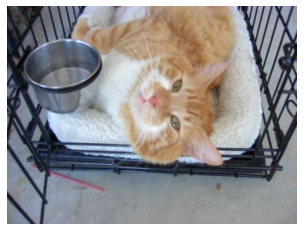

1/1 [==============================] - 0s 20ms/step
1위: dishwasher (31.37%
2위: shopping_cart (22.05%
3위: plate_rack (14.08%
4위: electric_fan (7.90%
5위: strainer (5.74%


In [28]:
pred_img(images[7])

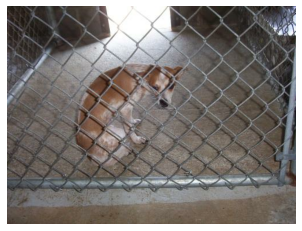

1/1 [==============================] - 0s 19ms/step
1위: chainlink_fence (49.15%
2위: electric_fan (7.18%
3위: Samoyed (5.70%
4위: French_bulldog (5.58%
5위: Siberian_husky (5.02%


In [29]:
pred_img(images[8])

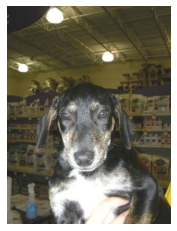

1/1 [==============================] - 0s 20ms/step
1위: Scottish_deerhound (13.62%
2위: miniature_pinscher (7.55%
3위: kelpie (6.51%
4위: bluetick (5.03%
5위: Airedale (4.24%


In [30]:
pred_img(images[9])

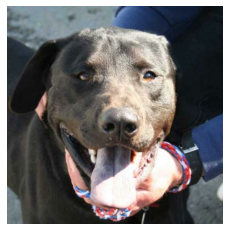

1/1 [==============================] - 0s 105ms/step
1위: American_Staffordshire_terrier (79.58%
2위: Weimaraner (8.67%
3위: Great_Dane (3.24%
4위: bull_mastiff (2.97%
5위: Staffordshire_bullterrier (2.26%


In [31]:
pred_img(images[10])

In [32]:
len(images)

30

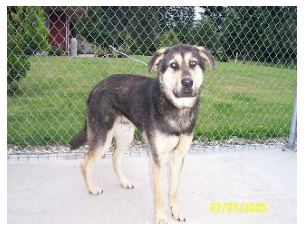

1/1 [==============================] - 0s 37ms/step
1위: Saluki (43.20%
2위: whippet (25.26%
3위: Scottish_deerhound (9.17%
4위: Great_Dane (7.90%
5위: borzoi (5.48%


In [33]:
pred_img(images[29])

-------------

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.
x_test = x_test.astype(np.float32) / 255.
print(x_train.shape,  x_test.shape)
print(y_train.shape,  y_test.shape)
gen = ImageDataGenerator(rotation_range=20, shear_range=0.2, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
augment_ratio = 1.5
augment_size = int(augment_ratio * x_train.shape[0])

randidx = np.random.randint (x_train.shape[0], size=augment_size)
x_augmented = x_train[randidx].copy()
y_augmented = y_train[randidx].copy()